## **Kiarash Pashna**
### Teacher, Delft University of Technology ( [profile](https://www.tudelft.nl/staff/k.pashna/?cHash=a13f6158d9c535d1bd4c28add4589dd1) )
##### [Personal Website](https://kiarash13p.github.io/) | [LinkedIn](https://www.linkedin.com/in/kiarash-pashna-843601148/) | [GitHub](https://github.com/kiarash13p) | [ResearchGate](https://www.researchgate.net/profile/Kiarash-Pashna)

This notebook is designed to provide a basic guideline for you to explore the concept of the `Herfindahl-Hirschman Index (HHI)`, a commonly used measure of market concentration. By the end of this activity, you will understand how to calculate HHI and later, interpret its significance in various industries.

Procedure is very easy and includes the following steps:
* Calculate an important factor influencing criticality.
* Download information regarding criticality from the web.
* Gain insights into differences between criticality lists.

### **What is Herfindahl-Hirschman Index?**

The Herfindahl-Hirschman Index (HHI) is a measure of market concentration and is calculated by summing the squares of the market shares of all firms/players/deposit-owners in the industry. The formula for HHI is:

$
HHI = \sqrt{\sum_{i=1}^{N} s_i^2}
$

where $ s_i $ is the market share of firm/company/country $ i $ (in percentage), and $ N $ is the total number of players.

### Steps to Calculate HHI:

1. **Identify the players**: List all the (important) players in the market (and/or their respective market shares).
2. **Convert Market Shares to Decimal**: Convert the market shares from percentages to decimals (e.g., 20% becomes 0.20).
3. **Square the Market Shares**: Square each firm's market share.
4. **Sum the Squares**: Add all the squared market shares together to get the HHI.
5. **Interpret the HHI**:
   - 0 ≤ HHI < 0.01: Highly competitive market (very well distributed production)
   - 0.01 ≤ HHI < 0.15: Unconcentrated production
   - 0.15 ≤ HHI < 0.25: Moderate concentration
   - 0.25 ≤ HHI < 0.5: High concentration
   - 0.5 ≤ HHI: 	Very high concentration (quasi monopoly) [Note: not instructed in the official methodology but added for completeness]

### **Example Calculation:**
Consider a market with three players ( here countries ) having the following production:
- Country A: 200 tonnes
- Country B: 300 tonnes
- Country C: 500 tonnes

1. Find the share of the world production: 


   | Country   | Production (tonnes) | Share of World Production |
   |-----------|--------------------|--------------------------|
   | A         | 200                | $\frac{200}{1000} = 0.2$ |
   | B         | 300                | $\frac{300}{1000} = 0.3$ |
   | C         | 500                | $\frac{500}{1000} = 0.5$ |

2. Calculate the square of each share:
   - Country A: $0.2^2 = 0.04$
   - Country B: $0.3^2 = 0.09$
   - Country C: $0.5^2 = 0.25$
3. Sum the squares:
   - HHI = $0.04 + 0.09 + 0.25 = 0.38 = 0.38$
4. Interpretation: An HHI of 0.38 indicates that the market is highly concentrated.

### **Let's try it together on a real-world example**

First, lets import the necessary libraries and set up the environment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
from io import StringIO
from IPython.display import display, Markdown
from tabulate import tabulate


#### **1. Setting the Scale and Timeframe**

Here, we are going to use the dataset provided by [World Mining Data](https://www.world-mining-data.info/?World_Mining_Data___Data_Section), which offers comprehensive information on global mining production. For this exercise, we will focus on the year 2020 and analyze the production data of **Iron** at a global scale.

*Important Note: All rights to the data provided by World Mining Data belong to the respective data sources mentioned in their references. This notebook is intended for educational purposes only, and users should ensure compliance with any data usage policies set forth by World Mining Data and its sources.*

In [2]:
# read the data from the excel file
# Each tab corresponds to a different country, and the production data is organized by year.

file = "Data/HHI/6.6. Production_of_Mineral_Raw_Materials_of_individual_Countries_by_Countries.xlsx"

# Read all sheets from the excel file
# Each sheet represents a different country's production data
df = pd.read_excel(file, sheet_name=None, skiprows=1)
countries = list(df.keys())

In [3]:
# Display the first few rows of the dataframe for a specific country (e.g., 'Australia')
display(df['Australia'].head())

,Australia,unit,2019,2020,2021,2022,2023,Change 19/23,Change 22/23
0,Iron,(t),567345032.0,567788649.0,570160503,584413159,589029943,3.822173,0.789986
1,Cobalt,(t),5746.0,5631.0,5232,5794,5217,-9.206404,-9.958578
2,Manganese,(t),3259200.0,3357500.0,3277460,3044900,2920850,-10.381382,-4.074025
3,Molybdenum,(t),NaN,NaN,0,277,1110,.,300.722022
4,Nickel,(t),158751.0,169344.0,150876,155007,149090,-6.085631,-3.817247


In [4]:
# Or show the production data for a specific country at the year 2020, for commodity 'Gold'

australia_2020 = df['Australia'][df['Australia']['Australia'] == 'Gold'][['Australia', '2020']]

display(australia_2020)

,Australia,2020
18,Gold,327952.0


#### **2. Calculating the shares**

Focusing on Iron production in 2020, we will calculate the market shares of the first 10 producing countries.

We can assume that the rest of the countries have negligible production for this exercise, so they will be the 11th player in our HHI calculation.

In [5]:
# define variables
commodity = 'Iron'
year = '2020'
production_data = {}

# Extract production data for the specified commodity and year from each country's sheet
for country in countries:
    country_df = df[country]
    production_row = country_df[country_df[country] == commodity]
    if not production_row.empty:
        production_value = float(production_row[year].values[0])
        if pd.notna(production_value):
            production_data[country] = float(production_value)

In [6]:
# Sort production_data by values in descending order and print the first 10 players
sorted_production = dict(sorted(production_data.items(), key=lambda x: x[1], reverse=True)[:10])

# Calculating the remaining production for other countries
total_production = sum(production_data.values())
top_10_production = sum(sorted_production.values())
remaining_production = total_production - top_10_production
sorted_production['Other Countries'] = remaining_production

# To ease the calculation and interpretation, we round the production values to millions of tonnes
for country in sorted_production:
    sorted_production[country] = sorted_production[country] / 1_000_000  # Convert to millions of tonnes

# Print the top 10 producers in a formatted table
print(f"The production data of first 10 main producers are:\n")

# Create table header
print(f"{'Country':<20} {'Production (Mtonnes)':>20}")
print("-" * 42)

# Print each country and its production with thousand separators
for country, production in sorted_production.items():
    print(f"{country:<20} {production:>20,.0f}")

The production data of first 10 main producers are:

Country              Production (Mtonnes)
------------------------------------------
Australia                             568
Brazil                                246
China                                 174
India                                 126
Russia                                 65
Ukraine                                49
Russia, Europe                         46
Canada                                 37
South Africa                           36
Iran                                   34
Other Countries                       157


In [7]:
# Now we can proceed to calculate the market shares
total_production_mtonnes = sum(sorted_production.values())
market_shares = {country: (production / total_production_mtonnes) for country, production in sorted_production.items()}
# Display market shares
print(f"\nThe market shares of the top producers are:\n")
# Create table header
print(f"{'Country':<20} {'Market Share (%)':>20}")
print("-" * 42)

# Print each country and its market share with two decimal places
for country, share in market_shares.items():
    print(f"{country:<20} {share*100:>20.2f}")

#printing total share
print("-" * 42)
print(f"{'Total Share (%)':<20} {sum(market_shares.values())*100:>20.2f}")


The market shares of the top producers are:

Country                  Market Share (%)
------------------------------------------
Australia                           36.90
Brazil                              15.98
China                               11.29
India                                8.20
Russia                               4.25
Ukraine                              3.20
Russia, Europe                       3.02
Canada                               2.41
South Africa                         2.35
Iran                                 2.19
Other Countries                     10.21
------------------------------------------
Total Share (%)                    100.00


#### **3. Calculating HHI**

Now that we have the market shares, we can proceed to calculate the HHI using the formula provided earlier. We will square each market share, sum them up, and interpret the result based on the HHI scale.

In [8]:
# the function to calculate HHI
def calculate_hhi(market_shares: dict) -> float:
    hhi = sum((share) ** 2 for share in market_shares.values())
    return hhi

# Calculate HHI
hhi_value = calculate_hhi(market_shares)
print(f"\nThe Herfindahl-Hirschman Index (HHI) for {commodity} production in {year} is: {hhi_value:.2f}")




The Herfindahl-Hirschman Index (HHI) for Iron production in 2020 is: 0.20


You can modify the `commodity` and `year` variables to analyze different commodities and years as needed, or find HHI on each year for trend analysis.

You can functionalize the code as needed.

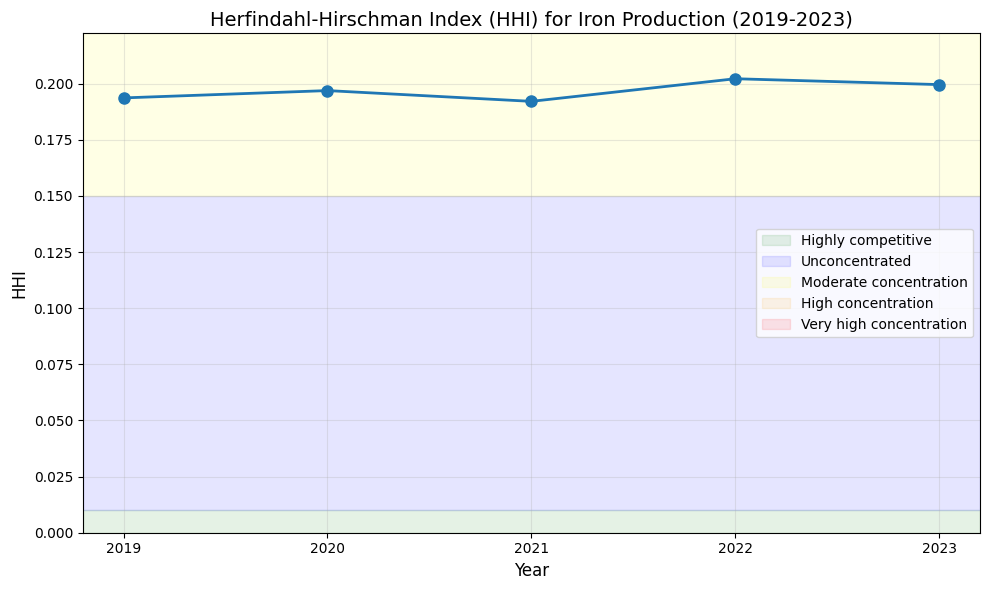

In [9]:
# example

# find HHI for Iron from 2019 to 2023

years = []
hhi_values = []

for yr in range(2019, 2024):
    year_str = str(yr)
    # Extract production data for the specified commodity and year from each country's sheet
    production_data = {}
    for country in countries:
        country_df = df[country]
        production_row = country_df[country_df[country] == commodity]
        if not production_row.empty:
            production_value = float(production_row[year_str].values[0])
            if pd.notna(production_value):
                production_data[country] = float(production_value)

    # Sort production_data by values in descending order and print the first 10 players
    sorted_production = dict(sorted(production_data.items(), key=lambda x: x[1], reverse=True)[:10])

    # Calculating the remaining production for other countries
    total_production = sum(production_data.values())
    top_10_production = sum(sorted_production.values())
    remaining_production = total_production - top_10_production
    sorted_production['Other Countries'] = remaining_production

    # To ease the calculation and interpretation, we round the production values to millions of tonnes
    for country in sorted_production:
        sorted_production[country] = sorted_production[country] / 1_000_000  # Convert to millions of tonnes

    # Now we can proceed to calculate the market shares
    total_production_mtonnes = sum(sorted_production.values())
    market_shares = {country: (production / total_production_mtonnes) for country, production in sorted_production.items()}

    # Calculate HHI
    hhi_value = calculate_hhi(market_shares)
    years.append(yr)
    hhi_values.append(hhi_value)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(years, hhi_values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Year', fontsize=12)
plt.xticks(years)
plt.ylabel('HHI', fontsize=12)
plt.title(f'Herfindahl-Hirschman Index (HHI) for {commodity} Production (2019-2023)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(0, max(hhi_values) * 1.1)

# Add HHI interpretation zones as horizontal bands
plt.axhspan(0, 0.01, alpha=0.1, color='green', label='Highly competitive')
plt.axhspan(0.01, 0.15, alpha=0.1, color='blue', label='Unconcentrated')
plt.axhspan(0.15, 0.25, alpha=0.1, color='yellow', label='Moderate concentration')
plt.axhspan(0.25, 0.5, alpha=0.1, color='orange', label='High concentration')
plt.axhspan(0.5, 1, alpha=0.1, color='red', label='Very high concentration')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

## **Conclusion:**

By following the steps outlined in this notebook, you should now be able to calculate the Herfindahl-Hirschman Index (HHI) for various commodities and interpret its significance in terms of market concentration. Understanding HHI can provide valuable insights into the competitive landscape of different industries and help inform strategic decisions.

The concept of Criticality is merely dependent on time and scale of your analysis. You can explore different years and scales (regional, national, global) to see how the HHI changes over time and across different contexts.

I recommend you to try implement aforementioned approach on different case studies, enabling your code being robust and meaningful. If you find anything vague or bugs, feel free to post your thoughts on [Issues](https://github.com/kiarash13p/Mineral-Resource-Geology-and-Modelling/issues) or [Discussion](https://github.com/kiarash13p/Mineral-Resource-Geology-and-Modelling/discussions) sections of this repository.

For students of TU Delft, your comments and questions in Brightspace are also welcome.

## References:

1. World Mining Data. (n.d.). Retrieved from https://www.world-mining-data.info/?World_Mining_Data___Data_Section

Suggested resources for further study and practice:

* _*European Commission: Directorate-General for Internal Market, Industry, Entrepreneurship and SMEs, Study on the critical raw materials for the EU 2023 – Final report, Publications Office of the European Union, 2023, https://data.europa.eu/doi/10.2873/725585*_